In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Maternal Health Risk Data Set.csv')

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memor


Distribution of Risk Levels:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


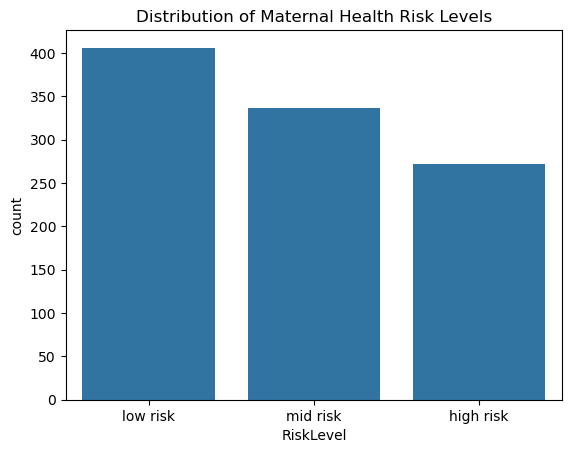

In [16]:
print("\nDistribution of Risk Levels:")
print(df['RiskLevel'].value_counts())

sns.countplot(x='RiskLevel', data=df, order=['low risk', 'mid risk', 'high risk'])
plt.title('Distribution of Maternal Health Risk Levels')
plt.show()

In [17]:
label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData has been preprocessed and split.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data has been preprocessed and split.
Training set shape: (811, 6)
Testing set shape: (203, 6)


In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:

model.fit(X_train, y_train)
print("\nModel training complete.")
y_pred = model.predict(X_test)



Model training complete.



Model Accuracy: 86.21%

Classification Report:
              precision    recall  f1-score   support

   high risk       0.96      0.95      0.95        55
    low risk       0.89      0.80      0.84        81
    mid risk       0.76      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



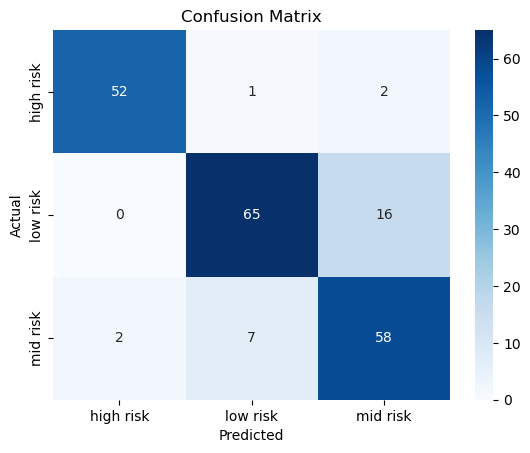

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:

#realistic test cases
#['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
test_cases = np.array([
    [25, 120, 80, 7.0, 98.6, 70],  # Case 1: Expected Low Risk
    [35, 135, 90, 8.5, 99.0, 80],  # Case 2: Expected Mid Risk
    [45, 150, 100, 11.0, 99.5, 95] # Case 3: Expected High Risk
])

test_cases_scaled = scaler.transform(test_cases)

predictions_numeric = model.predict(test_cases_scaled)

predictions_text = label_encoder.inverse_transform(predictions_numeric)

print("\n--- Manual Test Case Predictions ---")
for i, prediction in enumerate(predictions_text):
    print(f"Test Case {i+1}: Predicted Risk Level -> {prediction}")


--- Manual Test Case Predictions ---
Test Case 1: Predicted Risk Level -> low risk
Test Case 2: Predicted Risk Level -> high risk
Test Case 3: Predicted Risk Level -> high risk


D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import joblib
joblib.dump(model, 'maternal_risk_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [23]:
!pip show numpy scikit-learn joblib

Name: numpy
Version: 2.1.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the above copyright
        notice, this list of conditions and the following disclaimer.

     * Redistributions in binary form must reproduce the above
        copyright notice, this list of conditions and the following
        disclaimer in the documentation and/or other materials provided
        with the distribution.

     * Neither the name of the NumPy Developers nor the names of any
        contributors may be used to endorse or promote products derived
        from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED